In [2]:
require 'loadcaffe'
prototxt = '../../Data/VGG_caffe/VGG_ILSVRC_16_layers_deploy.prototxt'
binary = '../../Data/VGG_caffe/VGG_ILSVRC_16_layers.caffemodel'

-- this will load the network and print it's structure
net = loadcaffe.load(prototxt, binary)

Successfully loaded ../../Data/VGG_caffe/VGG_ILSVRC_16_layers.caffemodel


conv1_1: 64 3 3 3


conv1_2: 64 64 3 3
conv2_1: 128 64 3 3
conv2_2: 128 128 3 3


conv3_1: 256 128 3 3


conv3_2: 256 256 3 3


conv3_3: 256 256 3 3


conv4_1: 512 256 3 3


conv4_2: 512 512 3 3


conv4_3: 512 512 3 3


conv5_1: 512 512 3 3


conv5_2: 512 512 3 3


conv5_3: 512 512 3 3


fc6: 1 1 25088 4096


fc7: 1 1 4096 4096


fc8: 1 1 4096 1000


In [4]:
-- Loads the mapping from net outputs to human readable labels
function load_synset()
  local list = {}
  for line in io.lines'synset_words.txt' do
    table.insert(list, string.sub(line,11))
  end
  return list
end

function preprocess(img) 
--16 layer VGG expects a 3x224x224 sized image
  img = image.scale(img, 224, 224)
-- Directly obtained from the website
  local mean_pixel = torch.DoubleTensor({103.939, 116.779, 123.68})
-- Permuting from RBG to BGR
  local perm = torch.LongTensor{3, 2, 1}
-- Scaling the elements from 0:1 to 0:256
  img = img:index(1, perm):mul(256.0)
  mean_pixel = mean_pixel:view(3, 1, 1):expandAs(img)
-- Subtracting the mean
  img:add(-1, mean_pixel)
  return img
end

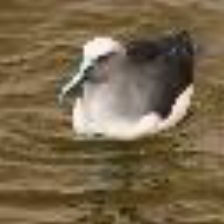

In [9]:
image_name = '../../Data/tiny-imagenet-200/test/images/test_4.JPEG'
im = image.load(image_name)
im = preprocess(im)
-- Displaying the image
itorch.image(image.scale(im, 224, 224)) -- rescale just to show the image


In [6]:
_,classes = net:forward(im):view(-1):sort(true)

In [37]:

synset_words = load_synset()

for i=1,5 do
  print('predicted class '..tostring(i)..': ', synset_words[classes[i]])
end

predicted class 1: 	goldfish, Carassius auratus	
predicted class 2: 	coral reef	
predicted class 3: 	monitor	
predicted class 4: 	modem	
predicted class 5: 	mosque	
